<a href="https://colab.research.google.com/github/Frans-Grau/Project-4_WebScraping/blob/main/F-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [305]:
### Imports
import pandas as pd
import numpy as np
from unicodedata import normalize
import requests
import seaborn as sns
import matplotlib.pyplot as plt


In [306]:
### Data upload - csv database
unicorns = pd.read_csv('https://raw.githubusercontent.com/Frans-Grau/Project-4_WebScraping/main/Database/List%20of%20Unicorns.csv')

In [307]:
### Data upload - wikipedia database
table_wiki = pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies')
wiki_unicorns = table_wiki[2]
#wiki_unicorns.to_pickle('wiki_unicorns.pickle')

### EDA I - Prepare & Merge both Datasets

In [308]:
### Rename & Drop columns
unicorns = unicorns.drop(['No.','Unnamed: 6','Unnamed: 7'], axis=1)
unicorns = unicorns.drop(['Key Investors'], axis = 1)
wiki_unicorns = wiki_unicorns.drop(['Valuation date','Founder(s)'], axis = 1)
unicorns = unicorns[['Name', 'Country','Industry','Valuation ($ Billion)']]
wiki_unicorns = wiki_unicorns[['Company','Country/ countries','Industry','Valuation (US$ billions)']]
wiki_unicorns = wiki_unicorns.rename(columns ={'Valuation (US$ billions)':'Valuation ($ Billion)', 'Company':'Name', 'Country/ countries':'Country'})

### Edit Numbers
wiki_unicorns['Valuation ($ Billion)'].replace({'5+':'5',"3+": "3", "2.1+": "2.1",'2+':'2','1.5+':'1.5','1+':'1','1.4+':'1.4'}, inplace=True)
wiki_unicorns['Valuation ($ Billion)'].replace('+','')
wiki_unicorns.drop(wiki_unicorns[wiki_unicorns['Valuation ($ Billion)'] == 'Undisclosed'].index, inplace = True)
wiki_unicorns['Valuation ($ Billion)'] = wiki_unicorns['Valuation ($ Billion)'].astype(float)
unicorns['Valuation ($ Billion)'] = unicorns['Valuation ($ Billion)'].astype(float)


### Merge both Datasets
final = pd.concat([unicorns,wiki_unicorns], axis=0)
final.reset_index(inplace=True)
final = final.drop(['index'], axis = 1)

### EDA II - Clean the final Dataset

In [309]:
### Check Duplicates
final['Name'] = final['Name'].str.lower()
final = final.drop_duplicates(subset = "Name")
final['Name'] = final['Name'].str.title()
final['Name'].replace({'Spacex':'SpaceX'}, inplace=True)

### Reset Index 
final.reset_index(inplace=True)
final = final.drop('index', axis =1)
final['Valuation ($ Billion)'] = final['Valuation ($ Billion)'].astype(float)

In [315]:
final

,Name,Country,Industry,Valuation ($ Billion)
0,Bytedance,China,Artificial intelligence,140.0
1,SpaceX,United States,Other,100.3
2,Shein,China,E-commerce & direct-to-consumer,100.0
3,Stripe,United States,Fintech,95.0
4,Klarna,Sweden,Fintech,45.6
...,...,...,...,...
1261,Dana,Indonesia,Financial technology,1.0
1262,Neo Financial,Canada,Financial technology,1.0
1263,Physicswallah,India,Educational technology,1.1
1264,Onecard,India,Financial technology,1.4


### Visualizations

<AxesSubplot:xlabel='Country', ylabel='Valuation ($ Billion)'>

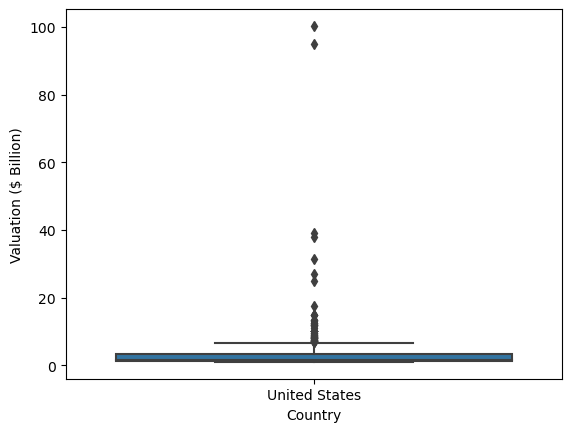

In [316]:
sns.boxplot(final[final['Country']=='United States'] , x = 'Country', y='Valuation ($ Billion)')

In [312]:
#sns.violinplot(unicorns[unicorns['Country']=='United States'])

In [313]:
#sns.displot(unicorns[unicorns['Country']=='United States'])